In [1]:
# pip install gensim konlpy kiwipiepy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import time
from tqdm.notebook import tqdm
import time, pickle, os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from konlpy.tag import Okt
from collections import Counter
from kiwipiepy import Kiwi
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD

import html


In [ ]:
import glob

pickle_file_path = glob.glob('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster*.pkl')

In [ ]:
df = pd.DataFrame()

for p in pickle_file_path :
    with open(p, 'rb') as f:
        new_df = pickle.load(f)
    df = pd.concat([df, new_df])

df = df.reset_index(drop =True)

df

,article,re_article,article_words,article_words_str,cluster,vector,action_cluster
0,"허리통증 요통 극복한 10km달리기, 반테린 무릎보호대 안녕하세요?마케팅 옹달샘,마...",허리통증 요통 극복한 km달리기 반테린 무릎보호대 안녕하세요?마케팅 옹달샘 마달샘입...,"[허리, 통증, 요통, 극복, 달리기, 테린, 무릎, 보호대, 마케팅, 옹달샘, 마...",허리 통증 요통 극복 달리기 테린 무릎 보호대 마케팅 옹달샘 마달샘 광복절 날 하루...,1,"[-0.77047604, -0.88154453, 2.3871849, 1.261635...",NaN
1,러닝엔 부스터 [ 잠백이 제품 Q&A / 리뷰 게시판 ]\n- 카테고리 미준수 삭제...,러닝엔 부스터 잠백이 제품 Q A 리뷰 게시판 카테고리 미준수 삭제 활동정지 질문글...,"[러닝, 부스터, 잠, 제품, 게시판, 카테고리, 준수, 삭제, 활동, 정지, 질문...",러닝 부스터 잠 제품 게시판 카테고리 준수 삭제 활동 정지 질문 글 등업 후 업로드,0,"[-0.027852988, 0.73391247, 0.27552006, 0.10273...",NaN
2,이번 여름 러닝하면서 후회되는 점올 여름엔 나름 꾸준히 러닝을 했습니다. 거의 매일...,이번 여름 러닝하면서 후회되는 점올 여름엔 나름 꾸준히 러닝을 했습니다. 거의 매일...,"[러닝, 점, 나름, 러닝, 러닝, 고요, 말, 나름, 마일리지, 결과, 지난, 국...",러닝 점 나름 러닝 러닝 고요 말 나름 마일리지 결과 지난 국제 평화 보시 기록 지...,0,"[0.15353866, -1.2186882, -0.10446429, -1.21156...",NaN
3,"7월 3주차 운동일지 - 우중런,작심삼일,짬뽕 이번 3주차에는 비가 많이 왔었습니다...",월 주차 운동일지 우중런 작심삼일 짬뽕 이번 주차에는 비가 많이 왔었습니다월요일 ...,"[주차, 운동, 일지, 우중, 런, 작심삼일, 짬뽕, 주차, 월요일, 문득, 삼일만...",주차 운동 일지 우중 런 작심삼일 짬뽕 주차 월요일 문득 삼일만 무조건 작심삼일 말...,0,"[0.8681608, -2.1748028, -1.8500092, 2.6215951,...",NaN
4,러닝 한달 쉬니까 못 뛰겠어요..응급실 갔다와서 컨디션이 올라오질 않네요ㅠ,러닝 한달 쉬니까 못 뛰겠어요..응급실 갔다와서 컨디션이 올라오질 않네요,"[러닝, 달, 쉬, 못, 응급실, 컨디션]",러닝 달 쉬 못 응급실 컨디션,0,"[0.43798575, -0.2038121, -0.4877728, -0.143773...",NaN
...,...,...,...,...,...,...,...
35725,컴포트 100일 염원달리기 3기 12일차 _ 우중런 (Running in the r...,컴포트 일 염원달리기 기 일차 우중런 Running in the rain 어제 경험...,"[포트, 염원, 달리기, 일차, 우중, 경험, 염원, 달리기, 에너지, 오후, 소진...",NaN,4,NaN,2.0
35726,내일이 바로 그날! 마라톤 하프코스 최종 준비 훈련 러닝 마라톤 하프코스 최종 준비...,내일이 바로 그날! 마라톤 하프코스 최종 준비 훈련 러닝 마라톤 하프코스 최종 준비...,"[그날, 최종, 준비, 훈련, 러닝, 최종, 준비, 훈련, 러닝, 캐리, 우드, 결...",NaN,4,NaN,2.0
35727,[아침 달리기] 클럽 트레일러닝 동네 마라톤 클럽 모임 날입니다. 동네 산 둘레길 ...,아침 달리기 클럽 트레일러닝 동네 마라톤 클럽 모임 날입니다. 동네 산 둘레길 트...,"[달리기, 클럽, 트레일, 러닝, 동네, 클럽, 모임, 동네, 둘레길, 트레일, 러...",NaN,4,NaN,3.0
35728,제 18회 달구벌 마라톤 하프코스 참가 후기 11월 10일 강정보에서 열렸던 제 1...,제 회 달구벌 마라톤 하프코스 참가 후기 월 일 강정보에서 열렸던 제 회 달구벌 마...,"[달구벌, 참가, 강정보, 달구벌, 참가, 러닝, 본격, 시작, 도전, 목표, 중간...",NaN,4,NaN,2.0


In [4]:
import pickle

with open('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster0.pkl','rb') as f:
    df0 = pickle.load(f)

with open('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster1.pkl','rb') as f:
    df1 = pickle.load(f)
with open('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster2.pkl','rb') as f:
    df2 = pickle.load(f)
with open('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster3.pkl','rb') as f:
    df3 = pickle.load(f)
with open('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster4.pkl','rb') as f:
    df4 = pickle.load(f)

In [5]:
df = pd.concat([df0,df1,df2,df3,df4])

In [6]:
df = df.reset_index(drop =True)

In [7]:
df.head()

,article,re_article,article_words,cluster,action_cluster
0,러닝엔 부스터 [ 잠백이 제품 Q&A / 리뷰 게시판 ]\n- 카테고리 미준수 삭제...,러닝엔 부스터 잠백이 제품 Q A 리뷰 게시판 카테고리 미준수 삭제 활동정지 질문글...,"[러닝, 부스터, 제품, 게시판, 카테고리, 준수, 삭제, 활동, 정지, 질문, 등...",0,1
1,이번 여름 러닝하면서 후회되는 점올 여름엔 나름 꾸준히 러닝을 했습니다. 거의 매일...,이번 여름 러닝하면서 후회되는 점올 여름엔 나름 꾸준히 러닝을 했습니다. 거의 매일...,"[러닝, 나름, 러닝, 러닝, 고요, 나름, 마일리지, 결과, 지난, 국제, 평화,...",0,5
2,"7월 3주차 운동일지 - 우중런,작심삼일,짬뽕 이번 3주차에는 비가 많이 왔었습니다...",월 주차 운동일지 우중런 작심삼일 짬뽕 이번 주차에는 비가 많이 왔었습니다월요일 ...,"[주차, 운동, 일지, 우중, 작심삼일, 짬뽕, 주차, 월요일, 문득, 삼일만, 무...",0,3
3,러닝 한달 쉬니까 못 뛰겠어요..응급실 갔다와서 컨디션이 올라오질 않네요ㅠ,러닝 한달 쉬니까 못 뛰겠어요..응급실 갔다와서 컨디션이 올라오질 않네요,"[러닝, 응급실, 컨디션]",0,2
4,우중주 저렴한 신발 대비법전에 동호회 선배가 비가 많이 오는 날 하고 왔던게 생각나...,우중주 저렴한 신발 대비법전에 동호회 선배가 비가 많이 오는 날 하고 왔던게 생각나...,"[우중, 신발, 대비, 법전, 동호회, 선배, 위생, 비닐, 신고, 신발, 우중, ...",0,4


In [ ]:
'''
import pickle

with open('/content/drive/My Drive/data/DCX/CX 프로젝트/네이버카페_액션클러스터.pkl','wb') as f:
    pickle.dump(df, f)
    '''

In [ ]:
#df['content_words'] = df['content_words'].apply(
#    lambda x: list(x) if isinstance(x, tuple) else x
#)

In [8]:
import json

with open('/content/drive/My Drive/data/DCX/DCX수업자료/SentiWord_info.json', encoding = 'utf-8-sig',mode = 'r') as f:
    sent_dicts = json.load(f)

In [9]:
#sentiment score

def sentiment_score(sent_dicts, token_list):

    result_list = []
    for token in token_list:
        for s in sent_dicts:
            if s['word'] == token:
                result = s['word'], s['polarity']
                result_list.append(result)
    return result_list

In [ ]:
subset = df[(df['cluster'] == 0) & (df['action_cluster']==2)].copy()

In [10]:
#형태소 재분리

from konlpy.tag import Okt
okt=Okt()

from kiwipiepy import Kiwi
kiwi = Kiwi()

In [11]:
def okt_pos_tagging(string):
    string = kiwi.space(string)
    post_words = okt.morphs(string, stem = True, norm = True)
    return post_words

In [12]:
sentiment = []

for tokens in tqdm(df['article_words']):   # 이미 토큰화된 리스트
    score = sentiment_score(sent_dicts, tokens)
    sentiment.append(score)

  0%|          | 0/17865 [00:00<?, ?it/s]

In [ ]:
sentiment = []

for tokens in tqdm(subset['article_words']):   # 이미 토큰화된 리스트
    score = sentiment_score(sent_dicts, tokens)
    sentiment.append(score)

  0%|          | 0/3147 [00:00<?, ?it/s]

In [14]:
avg_sents = []

for sents in tqdm(sentiment):
    sent_score = sum( [int(i[1]) for i in sents])
    avg_sents.append(sent_score)

df['sentiment_score'] = avg_sents

  0%|          | 0/17865 [00:00<?, ?it/s]

In [20]:
sent_dict = dict()

for actor in df['cluster'].unique():
    actor_df = df[df['cluster'] == actor]

    for action in actor_df['action_cluster'].unique():
        action_scores = actor_df[actor_df['action_cluster'] == action]['sentiment_score']
        action_score = np.mean(action_scores)
        sent_dict[f'Actor{actor}_Action{action}'] = action_score

In [16]:
sent_dict = dict()

for actor in subset['cluster'].unique():
    actor_df = subset[subset['cluster'] == actor]

    for action in actor_df['action_cluster'].unique():
        action_scores = actor_df[actor_df['action_cluster'] == action]['sentiment_score']
        action_score = np.mean(action_scores)
        sent_dict[f'Actor{actor}_Action{action}'] = action_score

NameError: name 'subset' is not defined

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
data = sent_dict.values()

data = np.array(list(data)).reshape(-1,1)

In [23]:
scaler = MinMaxScaler(feature_range=(-10,10))

trasnformed_data = scaler.fit_transform(data)

In [24]:
score_result = trasnformed_data.flatten().tolist()
score_result = [round(i,4) for i in score_result]

In [25]:
for key, new_value in zip(sent_dict.keys(), score_result):
    sent_dict[key] = new_value

In [26]:
sents_df = pd.DataFrame(sent_dict.items(), columns = ['Action','Satisfaction'])

In [31]:
sents_df.sort_values('Action').reset_index(drop=True)

,Action,Satisfaction
0,Actor0_Action1,5.3064
1,Actor0_Action2,7.7776
2,Actor0_Action3,8.2102
3,Actor0_Action4,8.0016
4,Actor0_Action5,7.8132
5,Actor1_Action1,7.1601
6,Actor1_Action2,9.0486
7,Actor1_Action3,3.6866
8,Actor1_Action4,-10.0000
9,Actor2_Action1,9.3615


In [ ]:
from collections import Counter

In [ ]:
# importance
importance_check = []

for actor , action in zip(df['cluster'], df['action_cluster']):
    action_flag = 'Actor'+str(actor)+'_Action'+str(action)
    importance_check.append(action_flag)

In [ ]:
freq = Counter(importance_check)

In [ ]:
importance_dict = dict()

total_count = sum(freq.values())

for key, value in freq.items():
    importance  = (value/total_count)*100
    importance_dict[key] = importance

In [ ]:
data = importance_dict.values()
data = np.array(list(data)).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,10))
trasnformed_data = scaler.fit_transform(data)

In [ ]:
score_result = trasnformed_data.flatten().tolist()
score_result = [round(i,4) for i in score_result]

In [ ]:
for key, new_value in zip(importance_dict.keys(), score_result):
    importance_dict[key] = new_value

In [ ]:
importance_list = []

for action in sents_df['Action']:
    importance_list.append(importance_dict[action])

In [ ]:
sents_df['Importance'] = importance_list

In [ ]:
def Opportunity_score(satisfaction, importance):
    result = importance + max(importance-satisfaction, 0)
    return result

In [ ]:
Opportunity_list = []

for s, i in zip(sents_df['Satisfaction'], sents_df['Importance']):
    Opportunity_list.append(Opportunity_score(s,i))

sents_df['Opportunity_score'] = Opportunity_list

In [ ]:
sents_df.sort_values('Action')

,Action,Satisfaction,Importance,Opportunity_score
0,Actor0_Action1,5.3064,2.4540,2.4540
3,Actor0_Action2,7.7776,9.5215,11.2654
2,Actor0_Action3,8.2102,8.7086,9.2070
4,Actor0_Action4,8.0016,10.0000,11.9984
1,Actor0_Action5,7.8132,9.2975,10.7818
7,Actor1_Action1,7.1601,1.4663,1.4663
5,Actor1_Action2,9.0486,1.3098,1.3098
8,Actor1_Action3,3.6866,1.8313,1.8313
6,Actor1_Action4,-10.0000,1.4172,12.8344
12,Actor2_Action1,9.3615,1.1411,1.1411


In [ ]:
pip install adjustText

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [ ]:
actions = sents_df.Action

color = np.random.rand(len(actions), 3)

Importances = sents_df.Importance
satisfaction = sents_df.Satisfaction

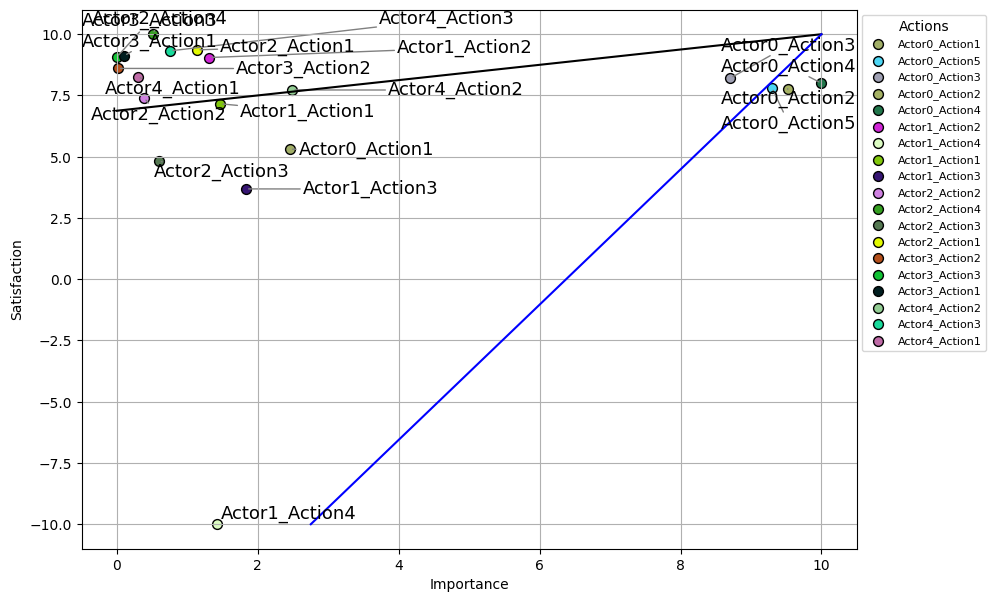

In [ ]:
plt.figure(figsize = (10,7))

for i, action in enumerate(actions):
    plt.scatter(Importances[i], satisfaction[i], c = [color[i]] , label = action , s = 50 , edgecolors= 'black')

plt.legend(title='Actions', fontsize = 8, title_fontsize=10, loc='best', bbox_to_anchor=(1,1))
plt.xlabel('Importance')
plt.ylabel('Satisfaction')

#만족도
xdata = [0,10]
ydata = [satisfaction.mean(),10]

plt.plot(xdata, ydata, 'k-')

#중요도

x_data = [Importances.mean(), 10]
y_data = [-10, 10]
plt.plot(x_data, y_data, color = 'blue', linestyle = '-')

texts = []

for i , action in enumerate(actions):
    texts.append(plt.text(Importances[i], satisfaction[i], action, fontsize = 13, ha = 'left'))

adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'grey', lw = 1))

plt.grid(True)
plt.savefig('/content/drive/My Drive/data/DCX/CX 프로젝트/total_map.png', dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
subset = df[(df['cluster'] == 0) & (df['action_cluster']==5)].copy()

# Join the list of words into a single string for TF-ID2
subset['article_words_str'] = subset['article_words'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(max_features=50)  # 원하는 만큼 상위 단어만
X = vectorizer.fit_transform(subset["article_words_str"])
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
tfidf_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_sorted, columns=['Word', 'TF-IDF Score'])

# Display the DataFrame
display(tfidf_df[:30])

,Word,TF-IDF Score
0,대회,685.834193
1,러닝,277.666785
2,참가,259.199434
3,완주,251.059649
4,달리기,240.058132
5,훈련,229.642479
6,기록,227.565468
7,페이스,192.743097
8,출발,175.528238
9,목표,172.957872


In [ ]:
tfidf_df.to_csv('/content/drive/My Drive/data/DCX/CX 프로젝트/cluster0_action5_tfidf.csv')

In [ ]:
subset = df[(df['cluster'] == 0) & (df['action_cluster']==2)].copy()

# Join the list of words into a single string for TF-IDF
subset['article_words_str'] = subset['article_words'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(max_features=50)  # 원하는 만큼 상위 단어만
X = vectorizer.fit_transform(subset["article_words_str"])
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
tfidf_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_sorted, columns=['Word', 'TF-IDF Score'])

# Display the DataFrame
display(tfidf_df[:30])

,Word,TF-IDF Score
0,러닝,882.434497
1,운동,407.996287
2,달리기,401.236123
3,페이스,302.795096
4,시작,221.101560
5,훈련,212.245492
6,기록,203.389129
7,도배,170.618468
8,조깅,167.477929
9,거리,152.394687


In [ ]:
tfidf_df.to_csv('/content/drive/My Drive/data/DCX/CX 프로젝트/cluster0_action2_tfidf.csv')

In [ ]:
subset = df[(df['cluster'] == 0) & (df['action_cluster']==4)].copy()

# Join the list of words into a single string for TF-ID2
subset['article_words_str'] = subset['article_words'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(max_features=50)  # 원하는 만큼 상위 단어만
X = vectorizer.fit_transform(subset["article_words_str"])
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
tfidf_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_sorted, columns=['Word', 'TF-IDF Score'])

# Display the DataFrame
display(tfidf_df[:30])

,Word,TF-IDF Score
0,러닝,1027.546705
1,신논현역,345.021522
2,친구,293.299911
3,구해,287.032037
4,양재동,276.893510
5,추천,244.590503
6,운동,233.303093
7,신발,145.152152
8,근처,139.056750
9,런닝,138.730926


In [ ]:
tfidf_df.to_csv('/content/drive/My Drive/data/DCX/CX 프로젝트/cluster0_action4_tfidf.csv')

In [ ]:
from gensim import corpora, models

# subset 추출
subset = df[(df['cluster']==1)]

# 토큰 리스트 (예: all_words 사용)
texts = subset["article_words"].tolist()

# 사전 & 코퍼스 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 학습
lda_model = models.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=4,   # 원하는 topic 수
                            random_state=42,
                            passes=10)

# 토픽 출력
print(lda_model.print_topics(num_words=10))

[(0, '0.034*"러닝" + 0.024*"페이스" + 0.016*"훈련" + 0.011*"조깅" + 0.011*"달리기" + 0.011*"시작" + 0.010*"운동" + 0.010*"목표" + 0.008*"무릎" + 0.008*"기록"'), (1, '0.015*"대회" + 0.010*"참가" + 0.009*"도착" + 0.009*"기록" + 0.007*"완주" + 0.007*"주로" + 0.007*"수원" + 0.007*"출발" + 0.007*"달리기" + 0.006*"러닝"'), (2, '0.016*"러닝" + 0.015*"달리기" + 0.008*"주말" + 0.007*"달리" + 0.007*"퇴근" + 0.006*"하루" + 0.006*"일요일" + 0.006*"동탄" + 0.005*"러너" + 0.005*"출근"'), (3, '0.074*"대회" + 0.013*"참가" + 0.013*"완주" + 0.011*"서울" + 0.011*"출발" + 0.008*"훈련" + 0.008*"트레일" + 0.007*"달리기" + 0.007*"기록" + 0.007*"준비"')]


In [ ]:
subset.head()

,article,re_article,article_words,cluster,action_cluster,sentiment_score
376,갑자기 몸살로 러닝 쉬어가기(쉬라는 신호)한참 러닝에 재미붙여서 9월들어 거의 매일...,갑자기 몸살로 러닝 쉬어가기 쉬라는 신호 한참 러닝에 재미붙여서 월들어 거의 매일 ...,"[갑자기, 몸살, 러닝, 신호, 한참, 러닝, 재미, 매일, 매일, 러닝, 오후, ...",1,2,2
377,"9/15, 9/16 후쿠오카 러닝일지안녕하세요~\n주말을 포함해 후쿠오카 여행을 다...",후쿠오카 러닝일지안녕하세요 주말을 포함해 후쿠오카 여행을 다녀왔습니다! 러닝 시작...,"[후쿠오카, 러닝, 일지, 주말, 포함, 후쿠오카, 여행, 러닝, 시작, 해외, 러...",1,3,0
378,"겨울 러닝 질문이요올해 4월부터 시작해서, 겨울 및 가을은 처음이라서\n준비할것도 ...",겨울 러닝 질문이요올해 월부터 시작해서 겨울 및 가을은 처음이라서 준비할것도 많고 ...,"[겨울, 러닝, 질문, 올해, 시작, 겨울, 가을, 준비, 운동복, 매일, 세탁, ...",1,2,0
379,이틀 연속 러닝 못하네요 ㅠ어제는 lsd 후 회복\n오늘 뛰려고 했는데 비가 쏟아져...,이틀 연속 러닝 못하네요 어제는 lsd 후 회복 오늘 뛰려고 했는데 비가 쏟아져요 ...,"[이틀, 연속, 러닝, 회복, 이틀, 체력, 강박]",1,2,-1
380,제 러닝의 치명적인 취약점을 깨달았습니다...바로 습도입니다.\n어제 뭔가 날씨는 ...,제 러닝의 치명적인 취약점을 깨달았습니다...바로 습도입니다. 어제 뭔가 날씨는 선...,"[러닝, 치명, 취약점, 습도, 뭔가, 선선, 습도, 평소, 런가, 증발, 반응, ...",1,2,0


In [ ]:
df.head()

,article,re_article,article_words,cluster,action_cluster,sentiment_score
0,러닝은 (유부남이 즐길 수 있는) 최고의 운동!20대초반 사이클 5년정도 탔었고 그...,러닝은 유부남이 즐길 수 있는 최고의 운동! 대초반 사이클 년정도 탔었고 그 밖에도...,"[러닝, 유부, 최고, 운동, 초반, 사이클, 탁구, 볼링, 축구, 족구, 풋살, ...",0,3,0
1,러닝후 자전거타기 스트레칭으로 좋은건가요?고관절부상으로 두달을 쉬다가 다시 뛰기 시...,러닝후 자전거타기 스트레칭으로 좋은건가요?고관절부상으로 두달을 쉬다가 다시 뛰기 시...,"[러닝, 자전거타기, 스트레칭, 건가, 관절, 부상, 시작, 골반, 교정, 운동, ...",0,2,-2
2,서울쪽 러닝 전문 치료마사지 추천해주실곳 있으실까요?심한통증은 아닌데 전반기 고하마...,서울쪽 러닝 전문 치료마사지 추천해주실곳 있으실까요?심한통증은 아닌데 전반기 고하마...,"[서울, 러닝, 전문, 치료, 마사지, 추천, 통증, 반기, 하마, 이후, 장경, ...",0,2,-5
3,"아디다스 듀라모 스피드2 짧은 후기 (뉴질랜드 여행 , 살짝 러닝)해외여행 갈 계획...",아디다스 듀라모 스피드 짧은 후기 뉴질랜드 여행 살짝 러닝 해외여행 갈 계획이 없었...,"[아디다스, 라모, 스피드, 뉴질랜드, 여행, 살짝, 러닝, 해외여행, 계획, 동생...",0,2,6
4,러닝하니까 몸의 안좋은 부분들을 다 알게되네요서른전까지 운동 한번 안해보다가\n결혼...,러닝하니까 몸의 안좋은 부분들을 다 알게되네요서른전까지 운동 한번 안해보다가 결혼하...,"[러닝, 부분, 운동, 한번, 결혼, 남편, 권유, 운동, 수영, 헬스, 자전거, ...",0,2,3


In [ ]:
subset = df[(df['cluster'] == 1) & (df['action_cluster']==4)].copy()

# Join the list of words into a single string for TF-ID2
subset['article_words_str'] = subset['article_words'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(max_features=50)  # 원하는 만큼 상위 단어만
X = vectorizer.fit_transform(subset["article_words_str"])
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
tfidf_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_sorted, columns=['Word', 'TF-IDF Score'])

# Display the DataFrame
display(tfidf_df[:30])

,Word,TF-IDF Score
0,러닝,133.132744
1,통증,131.976919
2,무릎,124.773084
3,부상,83.618735
4,운동,81.379768
5,치료,61.609548
6,달리기,56.023635
7,근육,51.805778
8,발목,50.426249
9,경우,39.612143


In [ ]:
tfidf_df.to_csv('/content/drive/My Drive/data/DCX/CX 프로젝트/cluster1_action4_tfidf.csv')

In [ ]:
1

1